# Introduction to APIs (Aplication Programming Interfaces)
## Pandas is an API
When you create a Pandas object with the dataframe constructor, in API lingo this is an 'instance'.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

dict_ = {
    'a': [11, 21, 31],
    'b': [12, 22, 32],
}

df = pd.DataFrame(dict_)
df.head()


,a,b
0,11,12
1,21,22
2,31,32


# REST APIs
Rest APIs function by sending a request, the request is communicated via HTTP message. The HTTP message usually contains JSON file. This contains instructions for what operation we would like the service or resource to perform. 

## Example using NBA API

In [24]:
from nba_api.stats.static import teams
import matplotlib.pyplot as plt

def one_dict(list_dict):
    """Converts a list of dictionaries into a dictionary of lists.

    Args:
        list_dict (array): Asks for an array of dictionaries

    Returns:
        _type_: returns a dictionary with the keys of the 
        dictionaries in the array and the values as a list 
        of the values of the dictionaries in the array
    """
    keys=list_dict[0].keys()
    out_dict={key:[] for key in keys}
    for dict_ in list_dict:
        for key, value in dict_.items():
            out_dict[key].append(value)
    return out_dict

nba_teams = teams.get_teams()
dict_nba_teams = one_dict(nba_teams)

df_teams = pd.DataFrame(dict_nba_teams)
df_teams.head()

,id,full_name,abbreviation,nickname,city,state,year_founded
0,1610612737,Atlanta Hawks,ATL,Hawks,Atlanta,Georgia,1949
1,1610612738,Boston Celtics,BOS,Celtics,Boston,Massachusetts,1946
2,1610612739,Cleveland Cavaliers,CLE,Cavaliers,Cleveland,Ohio,1970
3,1610612740,New Orleans Pelicans,NOP,Pelicans,New Orleans,Louisiana,2002
4,1610612741,Chicago Bulls,CHI,Bulls,Chicago,Illinois,1966


In [25]:
df_bulls = df_teams[df_teams['nickname'] == 'Bulls'] # Access the row of the dataframe that corresponds to the Bulls
id_bulls = df_bulls[['id']].values[0][0] # Access the first row and first column of the dataframe
id_bulls

np.int64(1610612741)

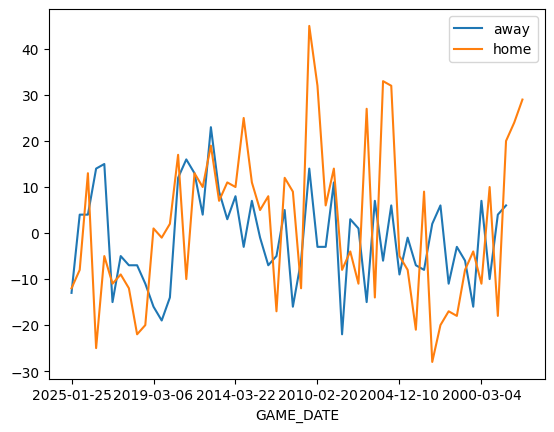

In [ ]:
from nba_api.stats.endpoints import leaguegamefinder

gamefinder = leaguegamefinder.LeagueGameFinder(team_id_nullable=id_bulls)
# gamefinder.get_json()

games = gamefinder.get_data_frames()[0]

games_home=games[games['MATCHUP']=='CHI vs. PHI']
games_away=games[games['MATCHUP']=='CHI @ PHI']

games_home['PLUS_MINUS'].mean()
games_away['PLUS_MINUS'].mean()

fig, ax = plt.subplots()

games_away.plot(x='GAME_DATE',y='PLUS_MINUS', ax=ax)
games_home.plot(x='GAME_DATE',y='PLUS_MINUS', ax=ax)
ax.legend(["away", "home"])
plt.show()